## Finding correlations between KOF index and Eurovision votes

In [288]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
#todo scatter plot of kof index vs. eurovision place

In [289]:
kof = pd.read_csv(os.path.join('data',r'KOF_globalization_modified.csv'))
kof = kof[["country", "KOFGI","year"]] # we're interested in just 'KOFGI' (see the explanation in 'KOF_globalisation_index_script' for why)
votes = pd.read_csv(os.path.join('data',r'votes_dataset_clean.csv'))

#todo: linear regression?

#### Getting only data between 1975 and 2016 in votes database

In [300]:
year_range = (1975, 2016)

votes = votes[(votes['Year'] >= year_range[0]) & (votes['Year'] <= year_range[1])]
kof = kof[(kof['year'] >= year_range[0]) & (kof['year'] <= year_range[1])]
    
countries_to_exclude = set(['Bosnia', 'Serbia & Montenegro', 'Yugoslavia'])  # Australia
country_filter = [(votes['From country'][i] not in countries_to_exclude) and
                  (votes['To country'][i] not in countries_to_exclude)
                  for i in votes.index]
votes = votes[country_filter]

# Filter out televoting for consistency (only in 2016)
votes = votes[votes['Jury or Televoting'] == 'J']

print(votes.head())
print(kof.head())

   Year (semi-) final Jury or Televoting From country To country  Points
0  1975             f                  J      Belgium    Belgium       0
1  1975             f                  J      Belgium    Finland       0
2  1975             f                  J      Belgium     France       2
3  1975             f                  J      Belgium    Germany       0
4  1975             f                  J      Belgium    Ireland      12
   country      KOFGI  year
5  Andorra  45.609665  1975
6  Andorra  45.992718  1976
7  Andorra  47.634552  1977
8  Andorra  47.870274  1978
9  Andorra  47.895931  1979


#### Rreformat the dataframes to make sure that all column names and values are consistent

In [301]:
total_points = votes.groupby(['To country', 'Year']).sum()

# rename the columns to be the same as the corresponding columns in kof
total_points.reset_index(inplace=True) 
total_points.rename(columns = {'To country':'country', 'Year':'year' }, inplace = True) 

# rename kof's countries to be consistent with total_points's countries
spellingChanges = {'Bosnia and Herzegovina': 'Bosnia & Herzegovina',
                  'Macedonia, FYR': 'F.Y.R. Macedonia',
                  'Netherlands': 'The Netherlands',
                  'Russian Federation': 'Russia',
                  'Slovak Republic': 'Slovakia'}
for c in spellingChanges:
    kof['country'] = kof['country'].replace([c], spellingChanges[c])

joined_df = pd.merge(total_points, kof,  how='left', left_on=['country','year'], right_on = ['country','year'])
joined_df.head()

,country,year,Points,KOFGI
0,Albania,2004,259,57.847328
1,Albania,2005,45,58.432987
2,Albania,2006,58,61.545925
3,Albania,2007,49,64.195969
4,Albania,2008,122,65.721687


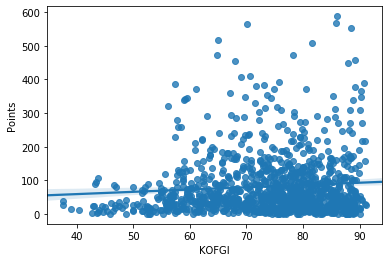

In [303]:
sns.regplot(x=joined_df["KOFGI"], y=joined_df["Points"])

In [304]:
# todo add grouping variable (rank) that will distinguish ranked from unranked